In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [ ]:

## Defining batch specfications
batch_size = 100
img_height = 224
img_width = 224
SEQUENCE_LENGTH = 20

In [ ]:
## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/kaggledata/train',
    seed=27,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 791 files belonging to 2 classes.


In [ ]:
## loading validation dataset
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/kaggledata/val',
    seed=27,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 98 files belonging to 2 classes.


In [ ]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/kaggledata/test',
    seed=27,
    image_size= (img_height, img_width),
    batch_size=batch_size)

class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 100 files belonging to 2 classes.


In [ ]:
model= tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, activation='relu'),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
retVal = model.fit(training_ds, validation_data=validation_ds, epochs = 25)
model.summary()


In [ ]:
model.save('model_n.h5')

In [ ]:
## stats on training data
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

In [ ]:
## stats on validation data
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

In [ ]:
## lets vizualize results on testing data
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
test_l,test_a=model.evaluate(testing_ds)

In [ ]:
## For single image with any size 
import cv2
img = cv2.imread('/content/drive/MyDrive/ijkijk.png')
res= cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
res= np.expand_dims(res, axis=0)
print(res.shape)
predictions = model.predict(res)
predlabel=[]
predlabel.append(class_names[np.argmax(predictions)])
print(predictions)
print(predlabel)

In [ ]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/model_n.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      1

In [ ]:
test_l,test_a=loaded_model.evaluate(testing_ds)

1/1 [==============================] - 40s 40s/step - loss: 0.2323 - accuracy: 0.9100


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.metrics import f1_score, accuracy_score

4/4 [==============================] - 7s 2s/step


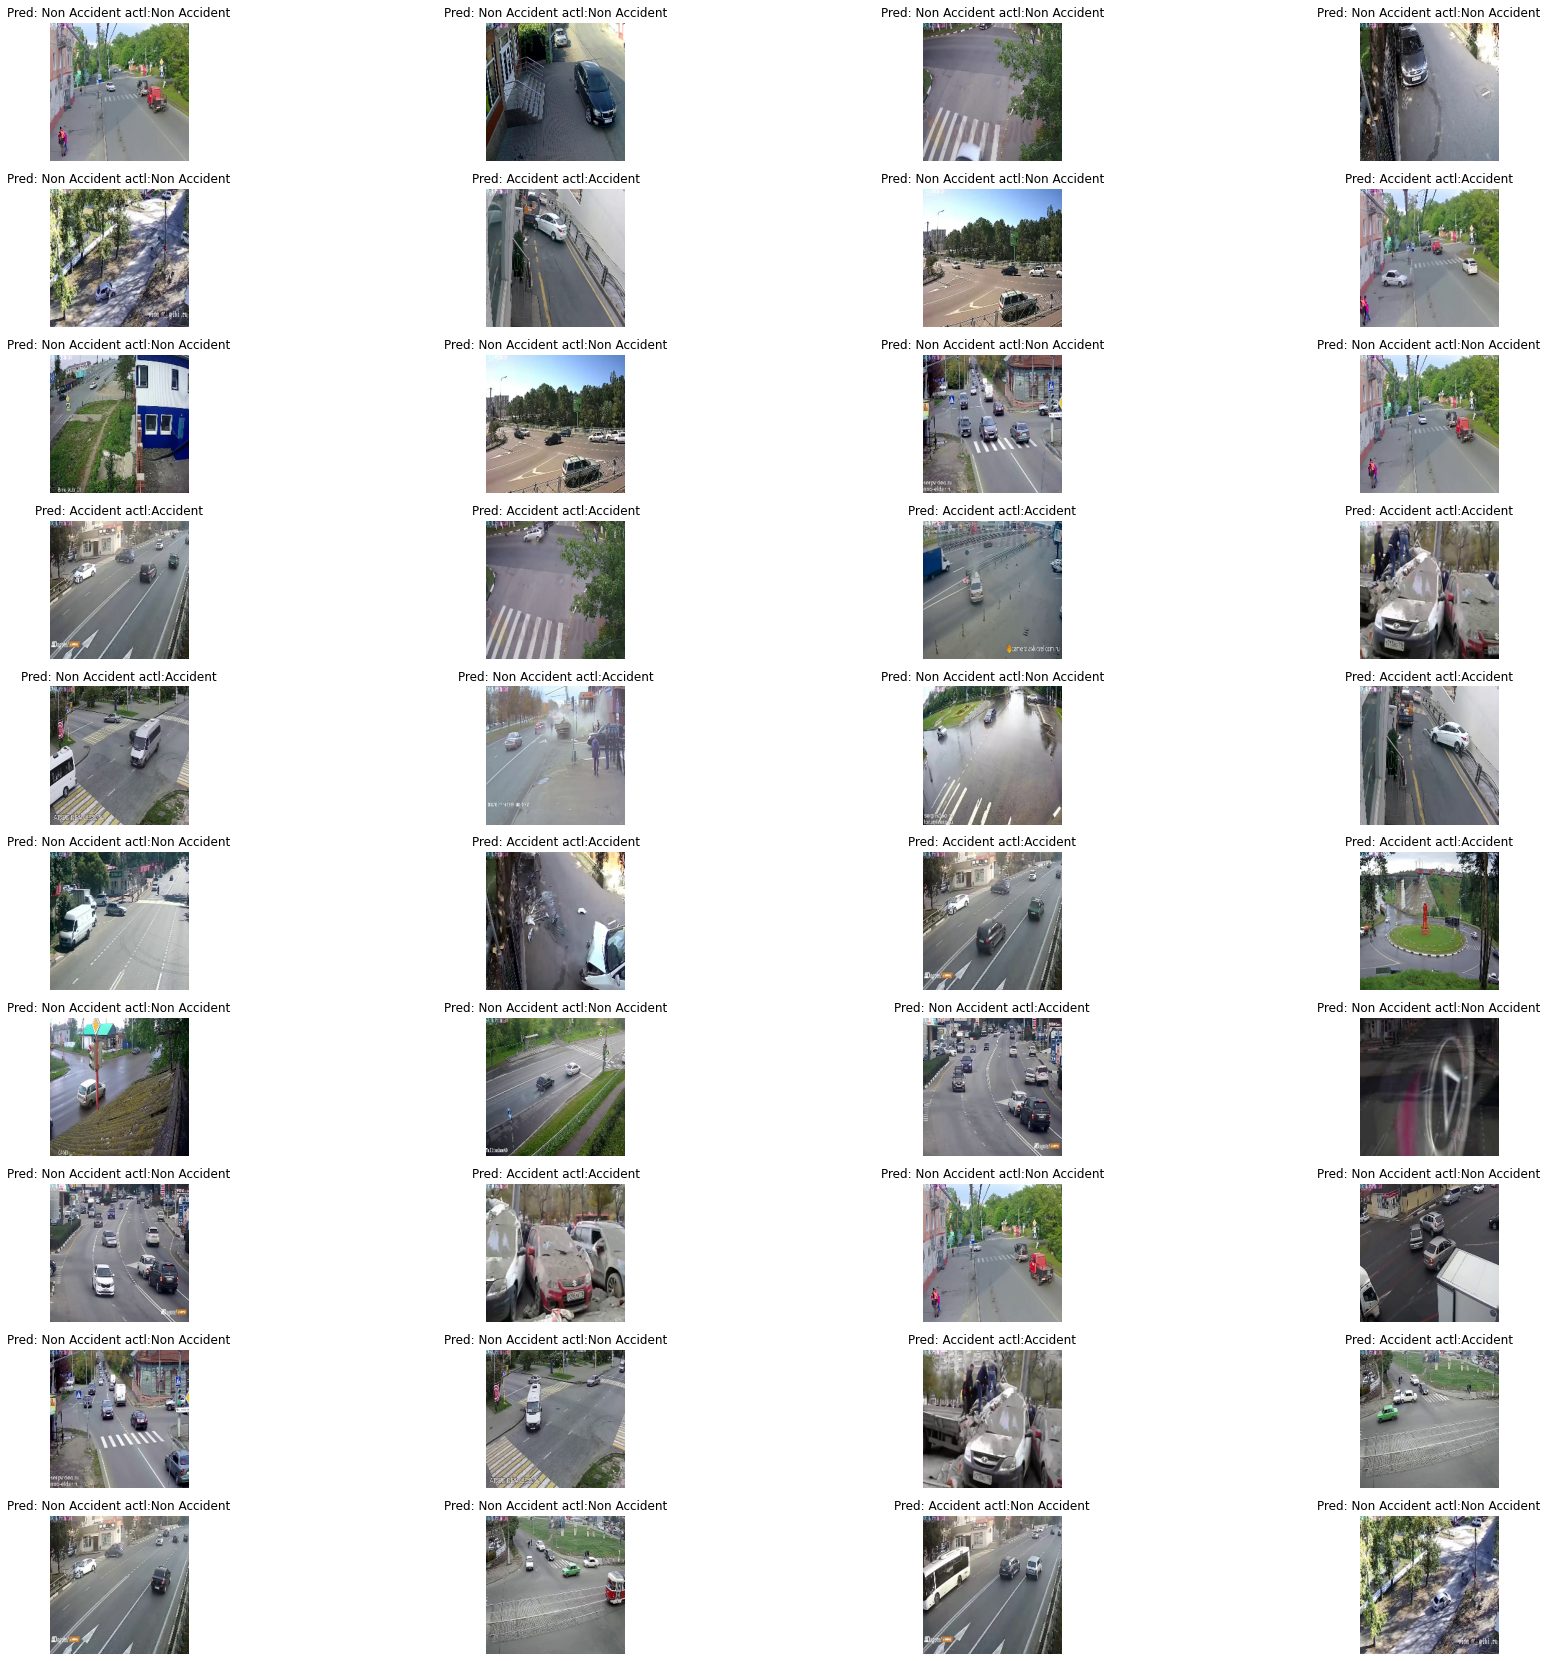

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = loaded_model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

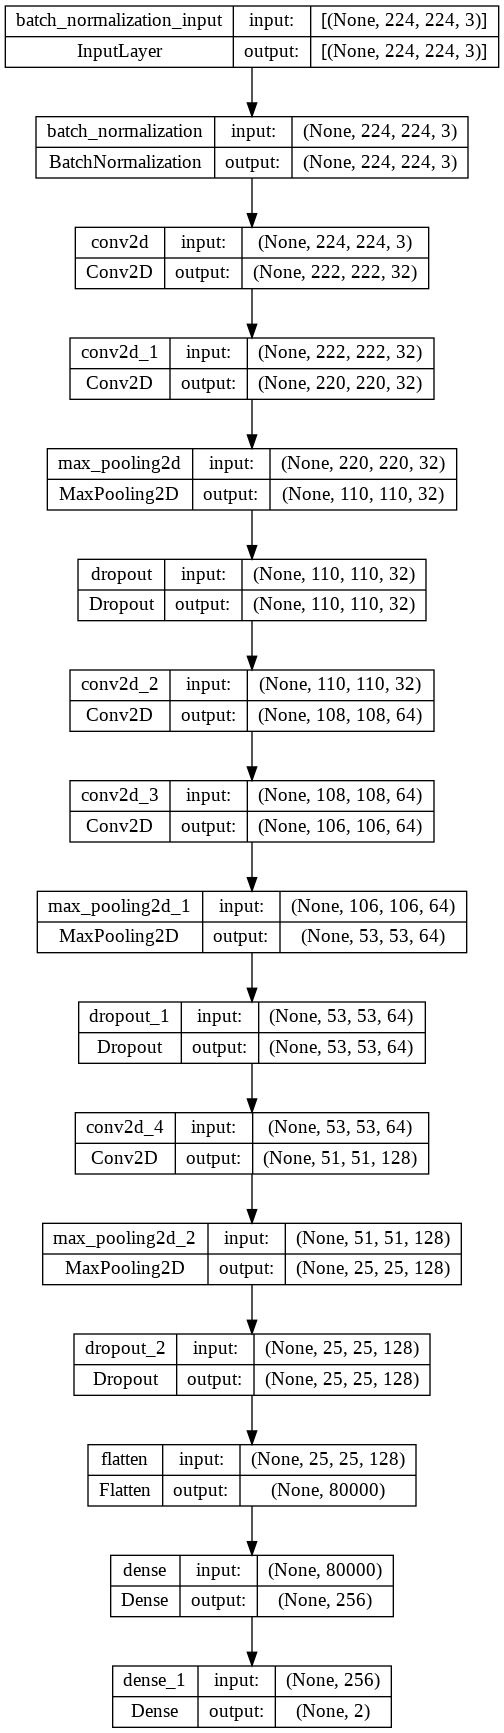

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(loaded_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from sklearn.metrics import classification_report

for images,label in testing_ds.take(1):
 print(classification_report(label,prdlbl))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        47
           1       0.89      0.94      0.92        53

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100

